In [51]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import json
from dateutil import parser
import datetime as dt
import numpy as np
import pprint
import matplotlib.pyplot as plt

In [52]:
df = pd.DataFrame
analyzer = SentimentIntensityAnalyzer()
d_start = dt.date(2017,12,13).toordinal()
d_end = dt.date(2018,3,19).toordinal()

In [53]:
ds = dt.date.fromordinal(d_start).isoformat()
print(ds)

2017-12-13


In [79]:
tweets = json.load(open('twitter archive'))

In [ ]:
t_text = list()
t_time = list()
t_sent = list()
for tweet in tweets:
    created = parser.parse(tweet['created_at'])
    if(created.date() <= dt.date(2017,12,13)) :
        break
    t_text.append(tweet['text'])
    t_sent.append(analyzer.polarity_scores(tweet['text'])['compound'])
    t_time.append(created)

In [65]:
tweets = df({'text' : t_text, 'time' : t_time, "sentiment" : t_sent})
tweets['time64'] = tweets.time.astype(np.int64)

In [66]:
tweets.head()

,sentiment,text,time,time64
0,0.3722,The Democrats do not want to help DACA. Would ...,2018-03-20 00:28:45+00:00,1521505725000000000
1,0.0900,RT @WhiteHouse: The opioid crisis has created ...,2018-03-19 22:38:15+00:00,1521499095000000000
2,-0.4810,A total WITCH HUNT with massive conflicts of i...,2018-03-19 13:07:50+00:00,1521464870000000000
3,0.6892,.@seanhannity on @foxandfriends now! Great! 8:...,2018-03-19 12:16:40+00:00,1521461800000000000
4,0.4440,Why does the Mueller team have 13 hardened Dem...,2018-03-18 12:35:42+00:00,1521376542000000000


In [67]:
n_date = list()
n_vol = list()
a_text = list()
a_header = list()
a_desc = list()
a_time = list()
a_sent = list()
for ds in range(d_start, d_end) :
    ds = dt.date.fromordinal(ds)
    n_date.append(ds)
    news = json.load(open('download/trump_'+ds.isoformat()+'.json'))
    n_vol.append(news['totalResults'])
    for article in news['articles'] :
        a_time.append(parser.parse(article['publishedAt']))
        header = article['title']
        desc = article['description']
        a_header.append(header)
        a_desc.append(desc)
        a_text.append(header+desc)
        a_sent.append(analyzer.polarity_scores(header+desc)['compound'])

In [68]:
news = df({'header' : a_header, 'desc' : a_desc, 'time' : a_time, "sentiment" : a_sent})
news['time64'] = news.time.astype(np.int64)
news = news.sort_values('time64')
news_agg = df({'date' : n_date, 'volume' : n_vol})

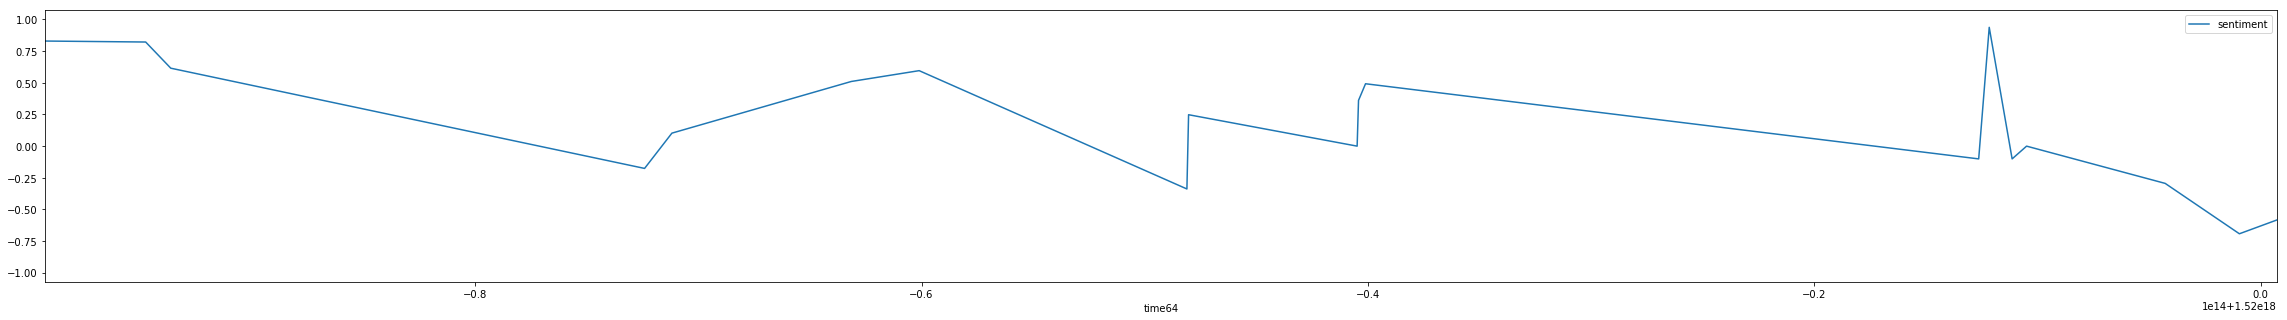

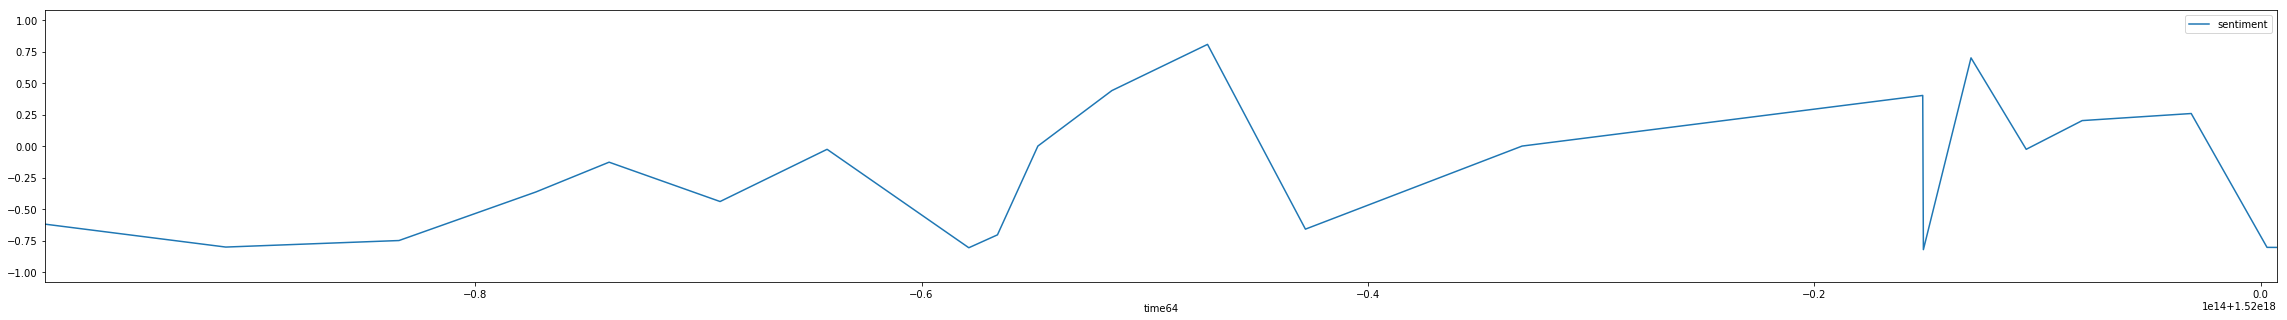

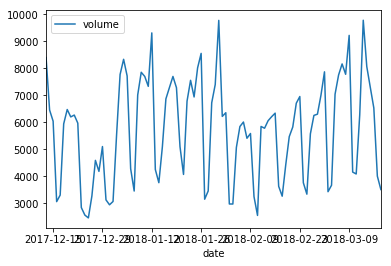

In [78]:
plt.figure()
tweets.plot(x='time64', y='sentiment', legend=True, figsize=(40,5), xlim = (1519900725000000000, 1520000725000000000))
news.plot(x='time64', y='sentiment', legend=True, figsize=(40,5), xlim = (1519900725000000000, 1520000725000000000))
news_agg.plot(x='date',y='volume')
plt.show()